####Dataset link: https://www.kaggle.com/datasets/sankha1998/tmdb-top-10000-popular-movies-dataset?resource=download&select=TMDb_updated.CSV

In [2]:
import pandas as pd

df = pd.read_csv("/content/TMDb_updated.CSV")

df.head()

,Unnamed: 0,title,overview,original_language,vote_count,vote_average
0,0,Ad Astra,"The near future, a time when both hope and har...",en,2853,5.9
1,1,Bloodshot,"After he and his wife are murdered, marine Ray...",en,1349,7.2
2,2,Bad Boys for Life,Marcus and Mike are forced to confront new thr...,en,2530,7.1
3,3,Ant-Man,Armed with the astonishing ability to shrink i...,en,13611,7.1
4,4,Percy Jackson: Sea of Monsters,"In their quest to confront the ultimate evil, ...",en,3542,5.9


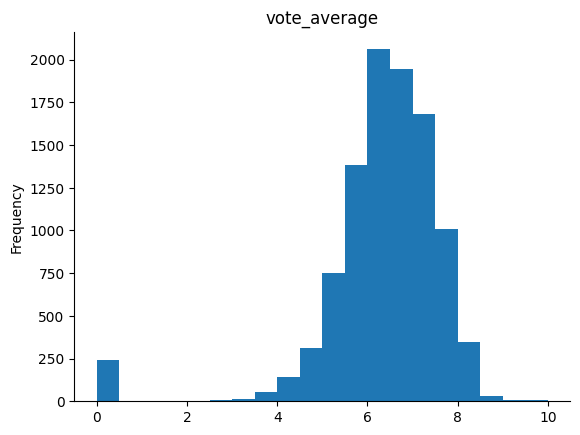

In [3]:
# vote_average

from matplotlib import pyplot as plt
df['vote_average'].plot(kind='hist', bins=20, title='vote_average')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
data_sorted = df.sort_values(by='vote_count', ascending=False)

filme_maior_votos = data_sorted.iloc[0]

print("Filme com o maior número de votos:")
print(filme_maior_votos[['title', 'vote_count']])

Filme com o maior número de votos:
title         Inception
vote_count        25148
Name: 80, dtype: object


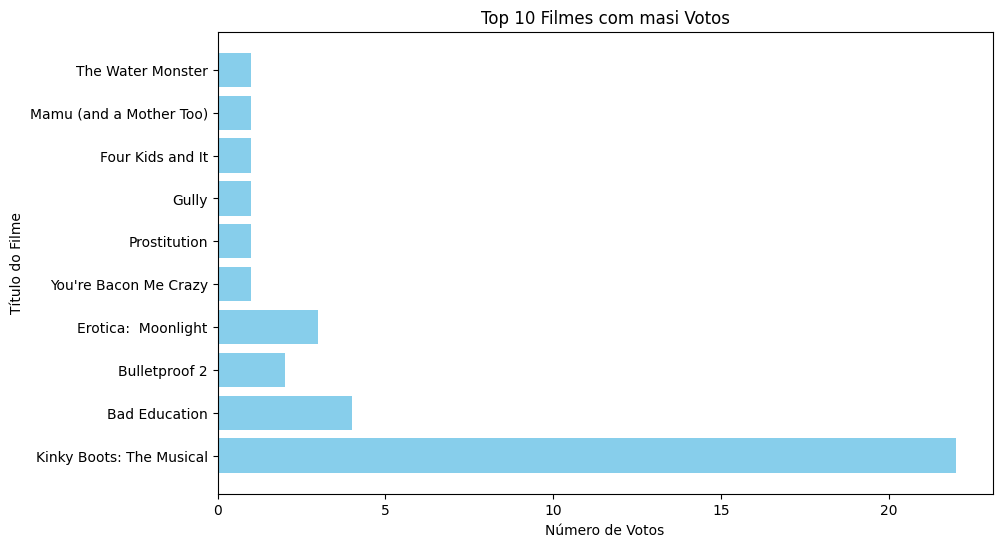

In [12]:
top_10_filmes = data_sorted.head(10)

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(top_10_filmes['title'], top_10_filmes['vote_count'], color='skyblue')
plt.xlabel('Número de Votos')
plt.ylabel('Título do Filme')
plt.title('Top 10 Filmes com masi Votos')
plt.gca().invert_yaxis()
plt.show()


In [6]:
data_sorted = df.sort_values(by='vote_average', ascending=False)
media = data_sorted.iloc[0]

print("Filme com a maior média de votos:")
print(media[['title', 'vote_average']])

Filme com a maior média de votos:
title           The Water Monster
vote_average                 10.0
Name: 1582, dtype: object


Linguagem com o maior número de filmes: en


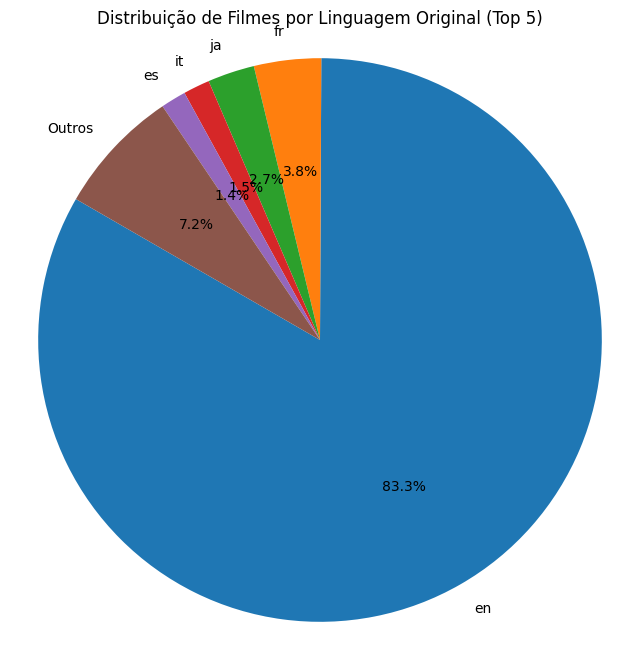

In [33]:
linguagens_contagem = df['original_language'].value_counts()

linguagem_mais_comum = linguagens_contagem.idxmax()
print("Linguagem com o maior número de filmes:", linguagem_mais_comum)

num_linguagens_principais = 5
outras_linguagens = linguagens_contagem[num_linguagens_principais:].sum()
top_linguagens = linguagens_contagem[:num_linguagens_principais]
top_linguagens['Outros'] = outras_linguagens

plt.figure(figsize=(8, 8))
plt.pie(top_linguagens, labels=top_linguagens.index, autopct='%1.1f%%', startangle=150)
plt.title('Distribuição de Filmes por Linguagem Original (Top 5)')
plt.axis('equal')
plt.show()
